## 3. 회귀 알고리즘과 모델 규제
- 지도 학습 알고리즘은 크게 분류와 회귀로 나뉨
- 회귀 : 두 변수 사이의 상관관계 분석, 임의의 어떤 숫자를 예측하는 문제

### 3-1. K-최근접 이웃 회귀
- 가장 가까운 샘플 k개를 선택
- k개의 샘플들의 평균으로 예측값 도출하기

In [3]:
import numpy as np
# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

산점도 그리기

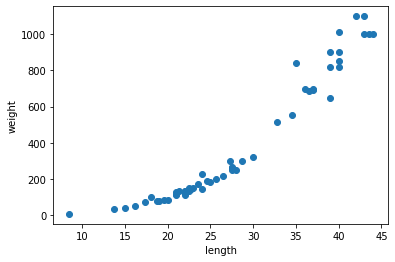

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

데이터를 훈련 셋, 데이터 셋으로 나누기

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

사이킷런은 훈련 셋으로 2차원 배열을 받으므로

train_input, test_input을 2차원 배열로 reshape하자

In [6]:
# reshape하는 방법
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

test_array = test_array.reshape(2, 2)
print(test_array.shape)

# reshape하자
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(4,)
(2, 2)
(42, 1) (14, 1)


결정 계수 $R^2$

coefficient of determination

KNeighborsRegressor 클래스에 k-근접 이웃 회귀 알고리즘이 구현되어있음

$R^2 = 1-\frac{\displaystyle\sum_{}^{}{(타겟-예측)^2}}{\displaystyle\sum_{}^{}{(타겟-타겟 평균)^2}}$

In [7]:
# 결정 계수
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# 학습시키기
knr.fit(train_input, train_target)

# 결정 계수
print(knr.score(test_input, test_target))

0.992809406101064


또다른 성능 측정법, 

평균 절댓값 오차 mean absolute error

타깃과 예측한 값 사이의 차이를 구함

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mean_absolute_error_val = mean_absolute_error(test_target, test_prediction)
print(mean_absolute_error_val)

19.157142857142862


과대 적합과 과소 적합
- overfitting 과대적합
  훈련 셋에서만 잘 맞는 모델인 경우
- underfitting 과소적합
  훈련 셋 점수 < 테스트 셋 점수이거나 둘다 점수가 낮은 경우

모델을 조금 더 복잡하게 만들어서(ex. k 개수 줄이기) 과소 적합 해결 가능함

In [9]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


과대 적합 / 과소 적합 연습해보기

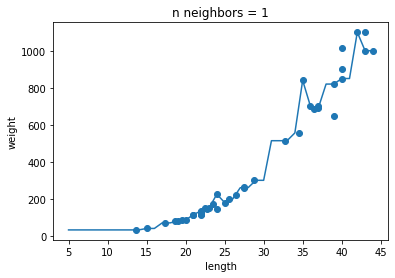

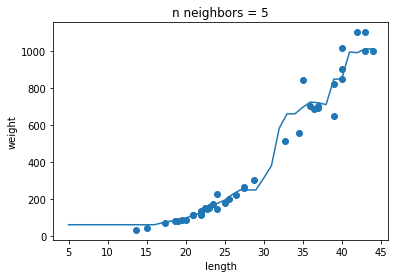

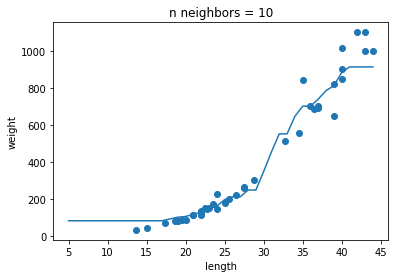

In [10]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]: #k 값
  # 모델 훈련시키기
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  # x에 대한 예측 구하기
  prediction = knr.predict(x)

  # 예측 결과를 그래프로
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title("n neighbors = {}".format(n))
  plt.xlabel("length")
  plt.ylabel("weight")
  plt.show()

### 3-2. 선형 회귀

k-최근접 이웃의 한계

데이터 준비하기

In [11]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

훈련시키기

In [12]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

print(knr.predict([[50]])) # 실제 무게는 1500g 이상이지만 이를 예측하지 못함

[1033.33333333]


시각화
- kneighbors regressor는 n개의 neighbors의 평균을 도출하므로 훈련 셋을 벗어난 데이터는 예측하지 못한다

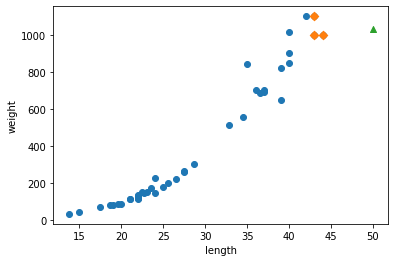

In [13]:
import matplotlib.pyplot as plt

# 50cm에 대응하는 이웃
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

# 훈련 데이터
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 50cm 데이터
plt.scatter(50, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [14]:
print(np.mean(train_target[indexes]))

1033.3333333333333


선형 회귀 linear regression

$y=a \times x + b$

$농어의 무게=a \times 농어의 길이 + b$

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [16]:
# 이때 a, b는
print(lr.coef_, lr.intercept_)
# coef_, intercept_는 머신러닝이 찾은 모델 파라미터

[39.01714496] -709.0186449535477


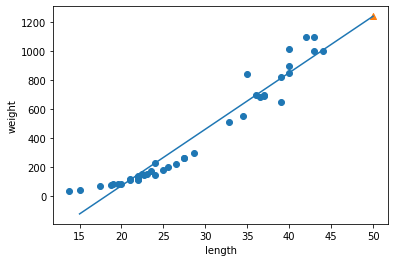

In [17]:
# 선형 회귀 결과 시각화하기
plt.scatter(train_input, train_target)

# 길이 15부터 50까지 선형회귀선을 그림
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [20]:
# 성능
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


다항 회귀

최적의 곡선 찾기

In [21]:
# input ^ 2인 칼럼 추가하기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [23]:
# 다시 선형 회귀 학습시키기
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [24]:
# 학습된 결과
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


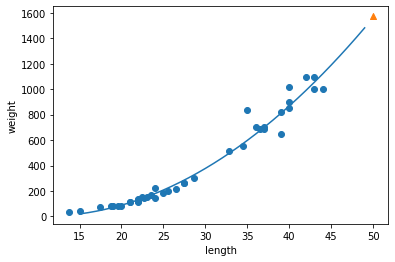

In [25]:
# 산점도 그려보기
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point+116.05)

plt.scatter(50, 1574, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [26]:
# R^2 점수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 3-3. 특성 공학과 규제
- feature engineering
  - 있는 특성을 사용
  - 특성을 제곱해서 사용
  - 특성 간 곱해서 사용
- 판다스 pandas
  - dataframe

In [28]:
import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data")

# input
perch_full = df.to_numpy()
print(perch_full)

# target
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

훈련 셋과 테스트 셋으로 나누기

In [29]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [31]:
# 전처리를 위한 클래스 transformer
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]])) # 각 특성의 제곱, 서로 곱한 값, 절편값이 추가됨

[[1. 2. 3. 4. 6. 9.]]


In [34]:
# train_input에 적용하기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(poly.get_feature_names_out())

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


다중 회귀 모델 훈련시키기
- 여러 개의 특성을 활용하여 선형 회귀를 하는 것

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594133


규제 regularization
- 머신 러닝 모델이 훈련 세트에 오버피팅되지 않도록 훼방하는 것


In [36]:
# Z점수로 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지 회귀 ridge
- 계수를 제곱한 값을 기준으로 규제를 적용함

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9857915060511934
0.9835057194929057


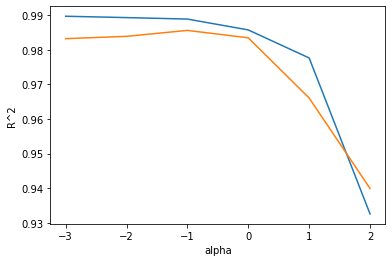

In [38]:
 # alpha 하이퍼파라미터로 규제 양을 조절할 수 있음
 # 최적의 알파 값을 시각화로 구하기
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
   ridge = Ridge(alpha=alpha)
   ridge.fit(train_scaled, train_target)
   train_score.append(ridge.score(train_scaled, train_target))
   test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

라쏘 회귀 lasso
- 계수의 절댓값을 기준으로 규제를 적용함

In [39]:
# 학습시키기
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.986591255464559
0.9846056618190413
